In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('loan_prediction.csv')  # read the data
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#first drop unnessesary column then remove duplicates & recheck the size
data=data.drop(columns=['Loan_ID','Married'],axis=1)

data.drop_duplicates(inplace=True)

print(data.shape)

(614, 11)


In [4]:
# check the no. of rows & column & finding the count of missing value
print(data.isna().sum())

#printing the summary of data type
data.info() 

Gender               13
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    ob

In [5]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


Observations:
    1) null vallues are present lets use mean  & mode method frist for missing values
    2) most of columns we have skwed data values .
    3)we have categorical data type(object type)

In [6]:
# Useing mean & mode method to fill the null values
data['Gender']=data['Gender'].fillna(data['Gender'].mode())
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode())
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode())
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

After using mode -mean method to fill null values still ther are null values are present lets drop it by using pandas drop na method

In [7]:
# Drop the nan rows & check the data shape again
data=data.dropna()

data.shape

(554, 11)

In [8]:
#understand again data at high level check the stastics of dataset
data.describe(include='all')

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,554,554,554,554,554.000000,554.000000,554.000000,554.000000,554.000000,554,554
unique,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,453,319,431,478,NaN,NaN,NaN,NaN,NaN,211,382
mean,NaN,NaN,NaN,NaN,5267.059567,1585.575668,144.969009,341.956679,0.843348,NaN,NaN
std,NaN,NaN,NaN,NaN,5455.163295,2524.484889,81.078416,64.727653,0.349310,NaN,NaN
min,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2843.750000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3839.500000,1149.000000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,5818.750000,2297.250000,166.750000,360.000000,1.000000,NaN,NaN


now the data loks great lets move further and some unique values r present so lets deal with it by using encoding tech.

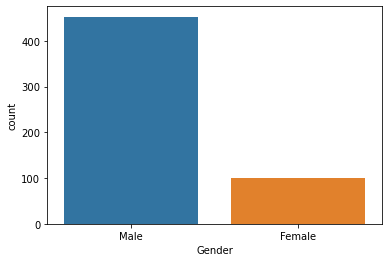

In [9]:
#plot each class frequency
sns.countplot(x='Gender',data=data)
plt.show()

From above graph we can see there are male applicant around 490 is more than the female applicant almost 100.

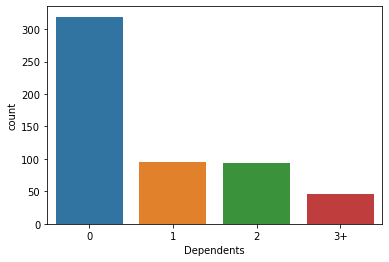

In [10]:
#plot each class frequency
sns.countplot(x='Dependents',data=data)
plt.show()

In above count spouse dependent is more than the other.

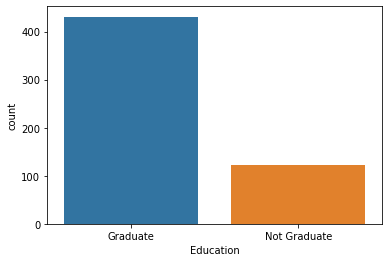

In [11]:
#plot each class frequency
sns.countplot(x='Education',data=data)
plt.show()

Almost 450 peoples or applicant are graduate & around 120 applicant are non graduate

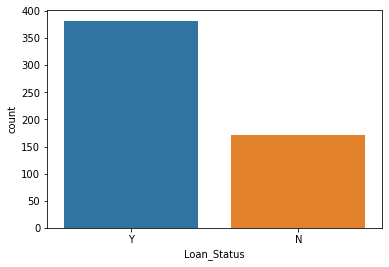

In [12]:
#plot each class frequency
sns.countplot(x='Loan_Status',data=data)
plt.show()

We can see the list of those who can get loan is more than those who cant get the loan it means the data imbalance is present in the target variable so we need to use resampling tech SMOTE.
Now , lets check the relation between target variable & label or independant variable

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

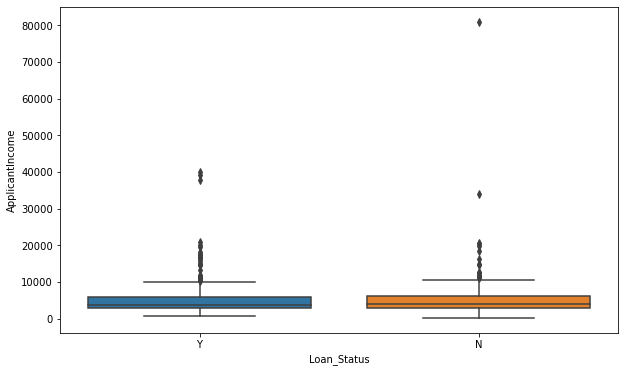

In [13]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='ApplicantIncome', x ='Loan_Status', data = data)

WE can see the those applicant who can get loan are having salary range from 0 to 40000 maximun & those who cant get loan salary range is 0to 38000 & there 2-3 appliacnt whose salary is above 80000 and still cant get the loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

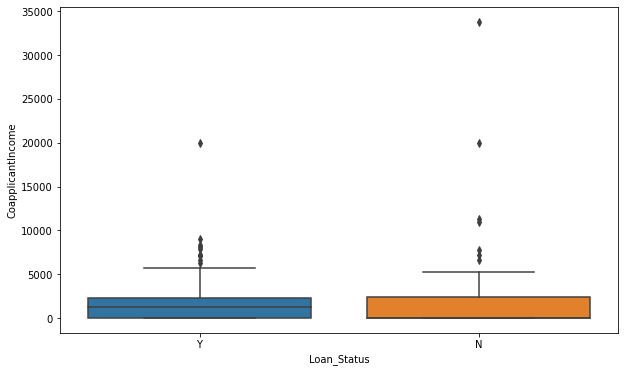

In [14]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='CoapplicantIncome', x ='Loan_Status', data = data)

Also the CoapplicantIncome those who get loan is 0 to 10000 & those who not get the loan is 0 to in between 35000

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

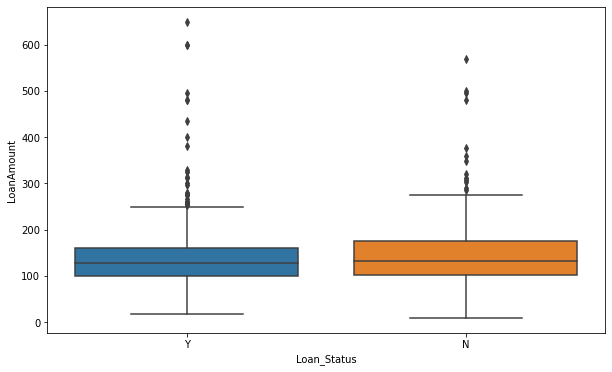

In [15]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='LoanAmount', x ='Loan_Status', data = data)

From above graph it is claer that the loan amount maximum loan amount is 650 those who got the loan.

In [16]:
# Lets frist covert categorical data into int 
label = LabelEncoder()
df=label.fit_transform(data['Gender']) 
pd.Series(df)
data["Gender"]=df

In [17]:
df=label.fit_transform(data['Education']) 
pd.Series(df)
data["Education"]=df

In [18]:
df=label.fit_transform(data['Self_Employed']) 
pd.Series(df)
data["Self_Employed"]=df

In [19]:
df=label.fit_transform(data['Loan_Status']) 
pd.Series(df)
data["Loan_Status"]=df

In [20]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Dependents', 'Property_Area']

In [21]:
# Using Get_dummies encoung tech for the other cat columns
df_dummies=pd.get_dummies(data[cat_col],drop_first=True)
data=data.join(df_dummies) #join to orignal dataset

In [22]:
data.drop(columns=(cat_col),axis=1,inplace=True) # Drop the orignal columns from the dataset 

In [23]:
data.head() # check the data after using encoding tech.

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,0
2,1,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,1
3,1,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,1
4,1,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1


In [24]:
data.shape # recheck the shape 

(554, 14)

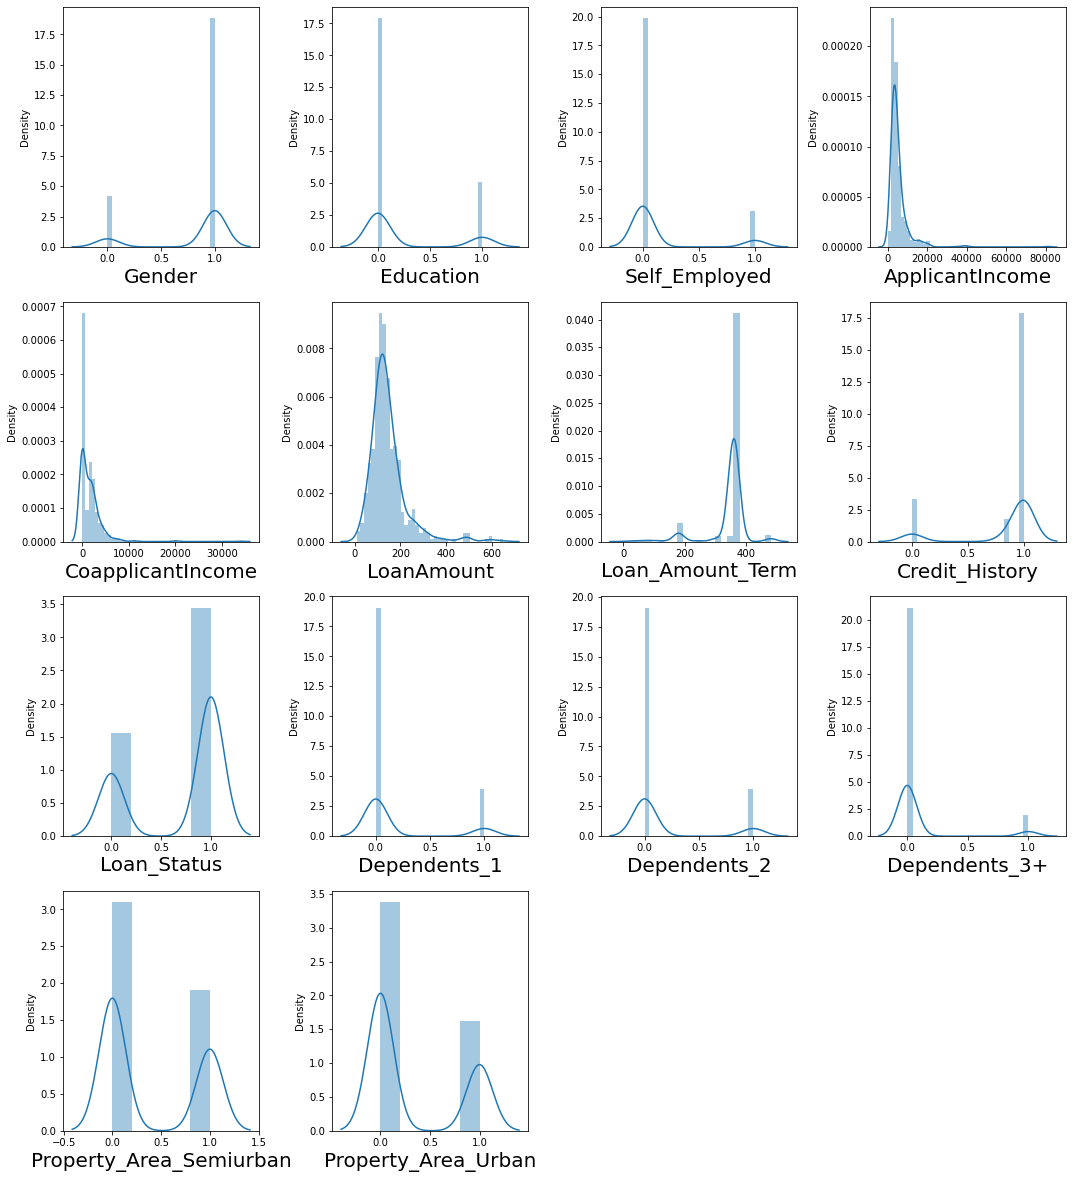

In [25]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

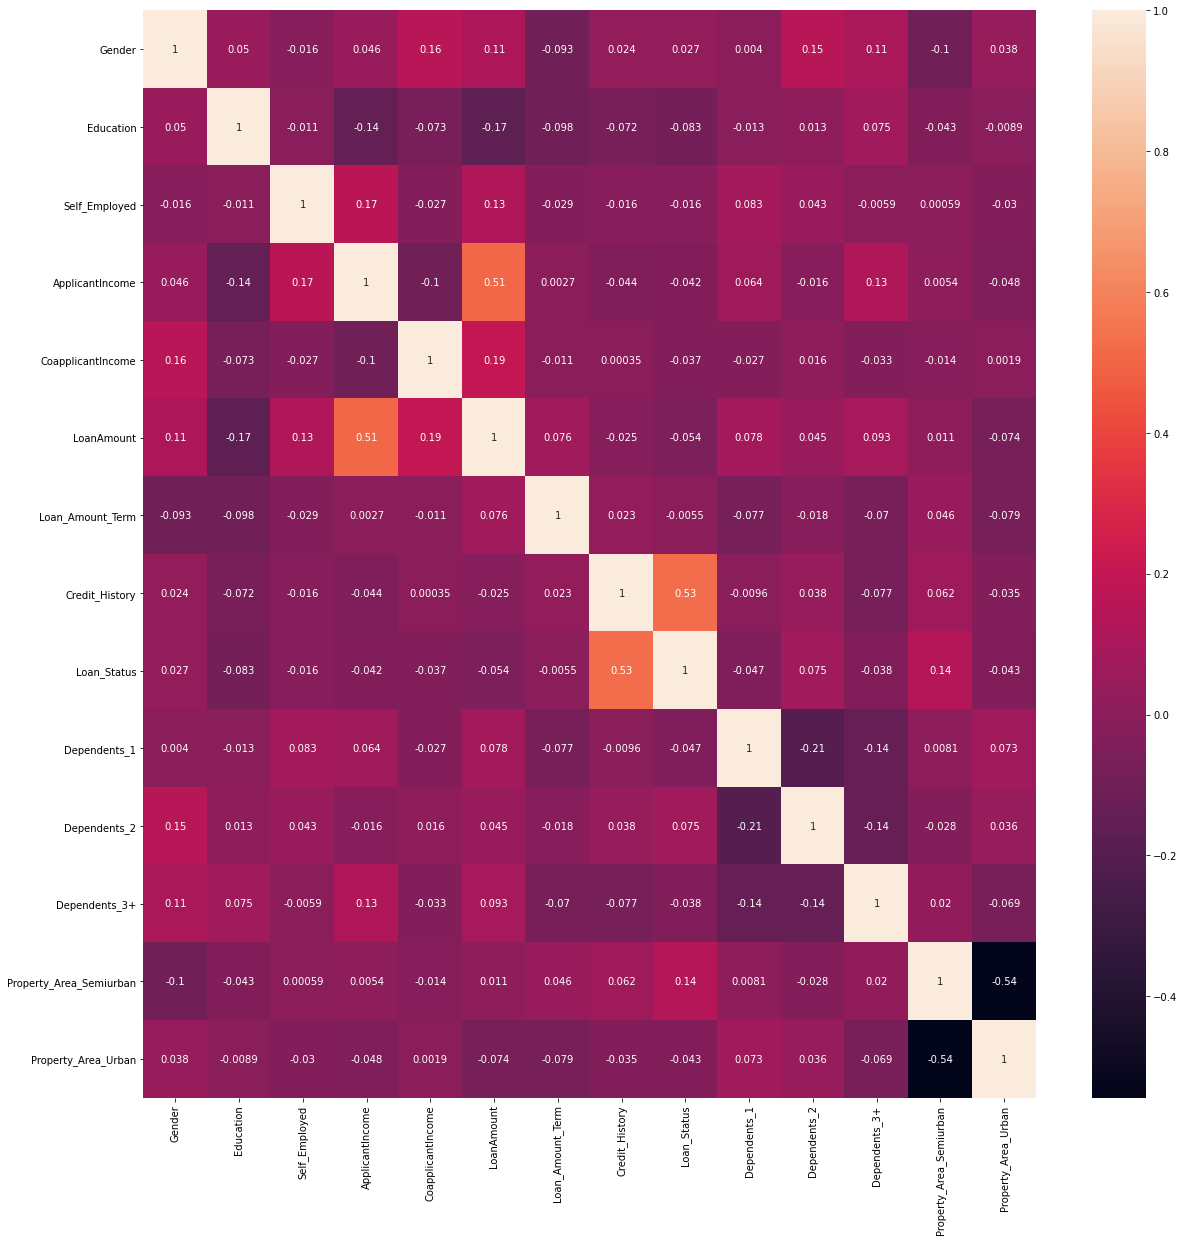

In [26]:
#check multicolinearity
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

From the distribution graph it is clear that there is outliers present in the applicantincome, coapplicantincome & loanamount let deal with it by IQR method. also there is no colinarity present in dataset so no need to fix it.

In [27]:
# Lets check skewness also 
data.skew()

Gender                    -1.650104
Education                  1.341337
Self_Employed              2.114870
ApplicantIncome            6.881481
CoapplicantIncome          5.736590
LoanAmount                 2.578663
Loan_Amount_Term          -2.463236
Credit_History            -1.972706
Loan_Status               -0.821489
Dependents_1               1.747880
Dependents_2               1.764886
Dependents_3+              3.030467
Property_Area_Semiurban    0.491999
Property_Area_Urban        0.749735
dtype: float64

Skewness is present in 'ApplicantIncome','CoapplicantIncome', 'Dependents_3+', 'LoanAmount','Self_Employed' so lets first deal with it by using power transform as we have very less skweness in the columns then we will deal with outliers

In [28]:
# Lets use power transformation to reduce the skewness
from sklearn.preprocessing import PowerTransformer

fetures=['ApplicantIncome','CoapplicantIncome', 'Dependents_3+', 'LoanAmount','Self_Employed']
pt=PowerTransformer()
data[fetures]=pt.fit_transform(data[fetures].values)

In [29]:
data[fetures]

,ApplicantIncome,CoapplicantIncome,Dependents_3+,LoanAmount,Self_Employed
0,0.582651,-1.104061,-0.300917,0.243540,-0.398743
1,0.192024,0.749997,-0.300917,-0.030332,-0.398743
2,-0.521186,-1.104061,-0.300917,-1.323697,2.507882
3,-0.784005,0.891844,-0.300917,-0.160468,-0.398743
4,0.622659,-1.104061,-0.300917,0.166391,-0.398743
...,...,...,...,...,...
609,-0.580210,-1.104061,-0.300917,-1.185682,-0.398743
610,0.011332,-1.104061,3.323173,-2.239588,-0.398743
611,1.077295,0.206010,-0.300917,1.398753,-0.398743
612,0.983179,-1.104061,-0.300917,0.752207,-0.398743


In [30]:
data.skew()

Gender                    -1.650104
Education                  1.341337
Self_Employed              2.114870
ApplicantIncome           -0.121492
CoapplicantIncome         -0.149353
LoanAmount                 0.036715
Loan_Amount_Term          -2.463236
Credit_History            -1.972706
Loan_Status               -0.821489
Dependents_1               1.747880
Dependents_2               1.764886
Dependents_3+              3.030467
Property_Area_Semiurban    0.491999
Property_Area_Urban        0.749735
dtype: float64

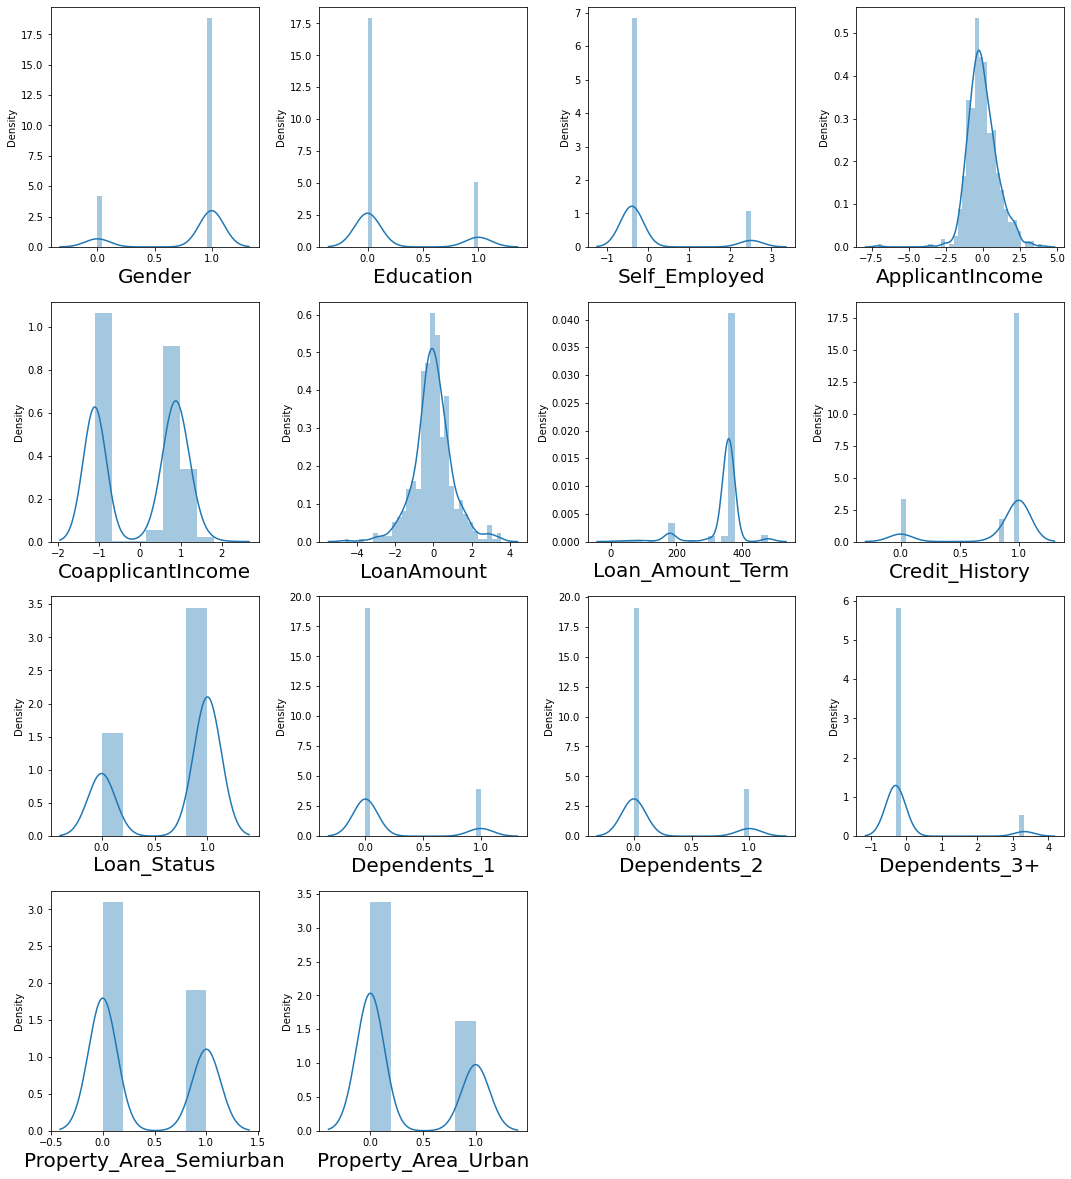

In [32]:
# Now lets check the distribution after removing skewness
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

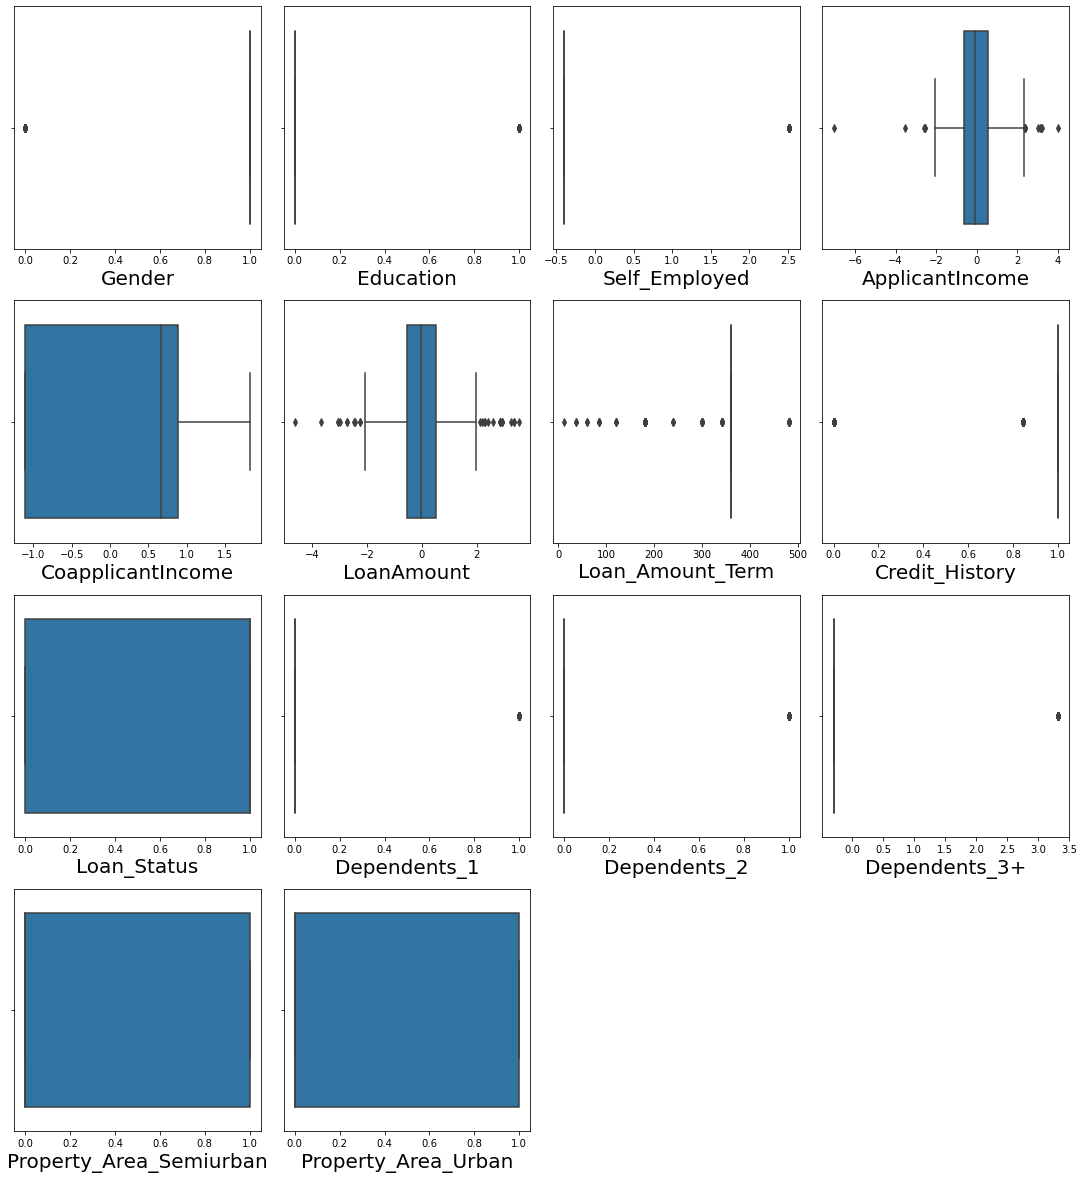

In [33]:
# Now lets check the distribution for the outliers by using box plot 
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [34]:
#As outliers present in features first remove it 
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [35]:
ApplicantIncome_H=(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome))
ApplicantIncome_L=(q3.CoapplicantIncome-(1.5*iqr.ApplicantIncome))
LoanAmount_H=(q3.LoanAmount+(1.5*iqr.LoanAmount))
LoanAmount_L=(q3.LoanAmount-(1.5*iqr.LoanAmount))

In [36]:
Index=np.where(data['ApplicantIncome']>ApplicantIncome_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([116, 141, 166, 168, 260, 281, 370, 401, 458], dtype=int64),)


(545, 14)

In [37]:
Index=np.where(data['ApplicantIncome']<ApplicantIncome_L)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([  6,  12,  13,  24,  29,  30,  35,  36,  44,  50,  65,  71,  75,
        76,  79,  90,  92,  99, 105, 109, 116, 130, 132, 138, 143, 151,
       157, 160, 162, 165, 166, 175, 194, 197, 222, 223, 234, 254, 255,
       264, 268, 269, 271, 273, 275, 283, 286, 299, 302, 341, 343, 348,
       354, 358, 361, 362, 366, 367, 370, 371, 375, 387, 388, 399, 400,
       426, 429, 444, 455, 458, 461, 471, 481, 482, 507, 515, 517, 519,
       522, 523, 536], dtype=int64),)


(464, 14)

In [38]:
Index=np.where(data['LoanAmount']>LoanAmount_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([  8, 131, 213, 244, 278, 281, 364, 393, 395, 426, 455], dtype=int64),)


(453, 14)

In [39]:
Index=np.where(data['LoanAmount']<LoanAmount_L)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([  2,   8,  12,  20,  31,  63,  72,  88,  95,  96, 108, 114, 121,
       132, 135, 138, 151, 152, 203, 231, 244, 248, 251, 262, 274, 280,
       293, 296, 297, 302, 304, 315, 342, 359, 376, 384, 397, 411, 421,
       431, 435, 448, 449], dtype=int64),)


(410, 14)

In [40]:
data.reset_index()
data

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,-0.398743,0.582651,-1.104061,0.243540,360.0,1.0,1,0,0,-0.300917,0,1
1,1,0,-0.398743,0.192024,0.749997,-0.030332,360.0,1.0,0,1,0,-0.300917,0,0
3,1,1,-0.398743,-0.784005,0.891844,-0.160468,360.0,1.0,1,0,0,-0.300917,0,1
4,1,0,-0.398743,0.622659,-1.104061,0.166391,360.0,1.0,1,0,0,-0.300917,0,1
5,1,0,2.507882,0.461296,1.080479,1.516083,360.0,1.0,1,0,1,-0.300917,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,-0.398743,-0.037523,0.729228,0.387360,360.0,1.0,1,0,1,-0.300917,0,0
608,1,0,-0.398743,-0.392537,0.831089,-0.370998,360.0,1.0,1,0,0,-0.300917,0,0
611,1,0,-0.398743,1.077295,0.206010,1.398753,360.0,1.0,1,1,0,-0.300917,0,1
612,1,0,-0.398743,0.983179,-1.104061,0.752207,360.0,1.0,1,0,1,-0.300917,0,1


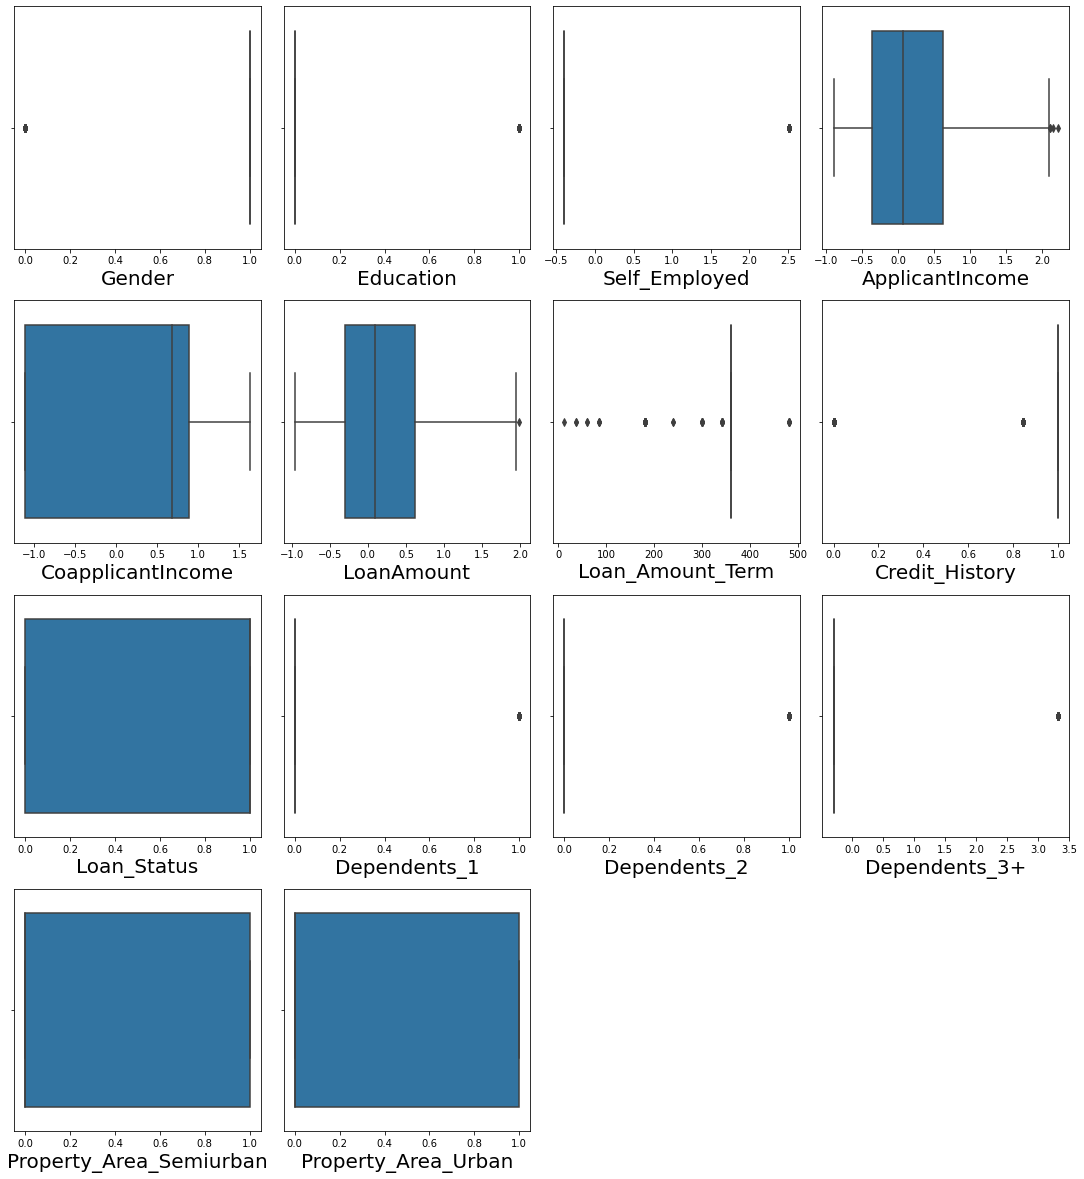

In [41]:
#Let's see the distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Now data looks great lets separate the data 

In [85]:
# Let's Seperate the data 
x=data.drop(columns=['Loan_Status'])
y=data['Loan_Status']

In [59]:
print(data['Loan_Status'].value_counts())

1    287
0    123
Name: Loan_Status, dtype: int64


Target data looks good not imbalance so, we lets move further for model selection 

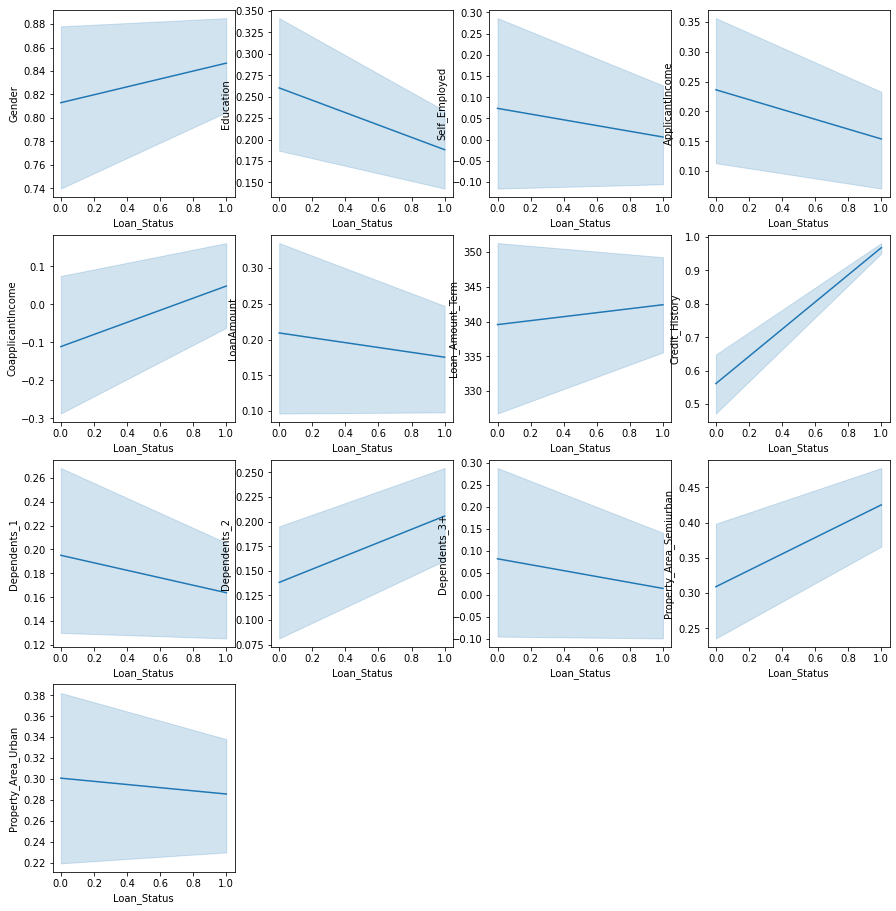

In [44]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [86]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [87]:
# Selecting perfect random state for better accuracy
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.35,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_train)
    pred=LR.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {accuracy_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {accuracy_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.8120300751879699
at random sate 0, the testing accuracy is:- 0.8125


at random sate 1, the training accuracy is:- 0.8045112781954887
at random sate 1, the testing accuracy is:- 0.8333333333333334


at random sate 2, the training accuracy is:- 0.8082706766917294
at random sate 2, the testing accuracy is:- 0.8194444444444444


at random sate 3, the training accuracy is:- 0.8007518796992481
at random sate 3, the testing accuracy is:- 0.8125


at random sate 4, the training accuracy is:- 0.8045112781954887
at random sate 4, the testing accuracy is:- 0.7916666666666666


at random sate 5, the training accuracy is:- 0.8045112781954887
at random sate 5, the testing accuracy is:- 0.8263888888888888


at random sate 6, the training accuracy is:- 0.8120300751879699
at random sate 6, the testing accuracy is:- 0.8055555555555556


at random sate 7, the training accuracy is:- 0.8345864661654135
at random sate 7, the testing accuracy is:- 0.78472222222

at 74,78 random state there is good accuarcy so lets select the 78 random state and lets split the data again

In [88]:
#Split data into train & test by using this new fetures
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.35,random_state=78)

In [90]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.95)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({1: 184, 0: 82})
Counter({1: 184, 0: 174})


# Build model to predict the loan status

In [91]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",accuracy_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [92]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [93]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.7346368715083799
Test Report: 0.7847222222222222
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.84      0.86      0.85       103

    accuracy                           0.78       144
   macro avg       0.74      0.72      0.73       144
weighted avg       0.78      0.78      0.78       144

Confusion Matrix: [[24 17]
 [14 89]]
Accuracy: 69.55 %
Standard Deviation: 0.84 %


In [94]:
# Model no.2
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.7708333333333334
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.56      0.58        41
           1       0.83      0.85      0.84       103

    accuracy                           0.77       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.77      0.77      0.77       144

Confusion Matrix: [[23 18]
 [15 88]]
Accuracy: 77.09 %
Standard Deviation: 1.68 %


In [95]:
#Model no.3
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.6666666666666666
Classification Report:               precision    recall  f1-score   support

           0       0.44      0.66      0.53        41
           1       0.83      0.67      0.74       103

    accuracy                           0.67       144
   macro avg       0.64      0.66      0.64       144
weighted avg       0.72      0.67      0.68       144

Confusion Matrix: [[27 14]
 [34 69]]
Accuracy: 72.63 %
Standard Deviation: 3.35 %


In [96]:
#Model no.4
from sklearn.ensemble import BaggingClassifier

bb=BaggingClassifier()

bb.fit(x_train_ns,y_train_ns)

print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9972067039106145
Test Report: 0.7152777777777778
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.71      0.59        41
           1       0.86      0.72      0.78       103

    accuracy                           0.72       144
   macro avg       0.68      0.71      0.68       144
weighted avg       0.76      0.72      0.73       144

Confusion Matrix: [[29 12]
 [29 74]]
Accuracy: 76.26 %
Standard Deviation: 2.51 %


In [97]:
#Model no.5
import xgboost as xgb

xgb=xgb.XGBClassifier()

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 1.0
Test Report: 0.75
Classification Report:               precision    recall  f1-score   support

           0       0.55      0.71      0.62        41
           1       0.87      0.77      0.81       103

    accuracy                           0.75       144
   macro avg       0.71      0.74      0.72       144
weighted avg       0.78      0.75      0.76       144

Confusion Matrix: [[29 12]
 [24 79]]
Accuracy: 69.83 %
Standard Deviation: 1.68 %


# lets check ROC AUC curve for fitted model¶

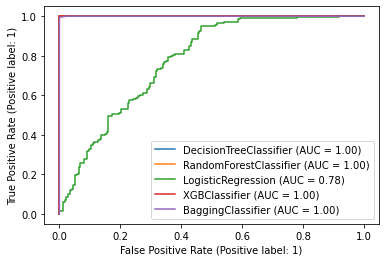

In [98]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(bb,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets check how our model works on test data¶

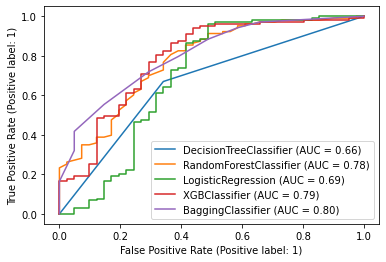

In [99]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bb,x_test,y_test,ax=disp.ax_)

from above both roc_auc plot on train and test data the best model is bagging so lets check by using hyper tune parameter

In [106]:
# Hyper tuning by using GridSearchCV

from sklearn.model_selection import GridSearchCV

para={'max_features':range(1,10),'random_state':[30,41,74,78],'n_estimators':range(10,100,10)}
grid=GridSearchCV(estimator=bb, param_grid=para,cv=2)
grid.fit(x_train_ns,y_train_ns)

print(grid.best_params_)

{'max_features': 9, 'n_estimators': 10, 'random_state': 41}


In [126]:
bb=BaggingClassifier(max_features=9,random_state=41,n_estimators=10)

bb.fit(x_train_ns,y_train_ns)

print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(bb)

Train Report: 0.994413407821229
Test Report: 0.7430555555555556
Classification Report:               precision    recall  f1-score   support

           0       0.54      0.71      0.61        41
           1       0.87      0.76      0.81       103

    accuracy                           0.74       144
   macro avg       0.70      0.73      0.71       144
weighted avg       0.77      0.74      0.75       144

Confusion Matrix: [[29 12]
 [25 78]]
Accuracy: 75.98 %
Standard Deviation: 2.79 %


# Roc_curve after hypertuning on train data

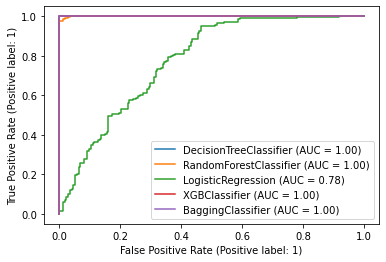

In [123]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(bb,x_train_ns,y_train_ns,ax=disp.ax_)

# Roc_curve after hypertuning on test data

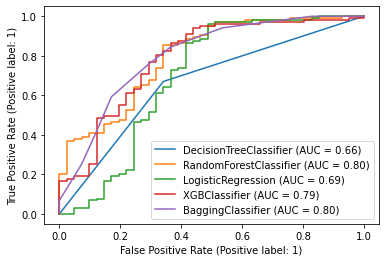

In [124]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bb,x_test,y_test,ax=disp.ax_)

# Looking at accuracy, ROC AUC Curve & confusion matrix i m selecting BaggingClassifier with GridSearchCV hypertune parameter by using Kfold cross validation method¶

In [125]:
#save model
import pickle
Filename='Finalized_model_loan.pickle'
pickle.dump(bb,open(Filename,'wb'))